In [19]:
import pandas as pd
import numpy as np
import pickle
import math
import time
from scipy.stats import kurtosis
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV, StratifiedShuffleSplit
from sklearn.neural_network import MLPClassifier
from sklearn.mixture import GaussianMixture
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score, average_precision_score, f1_score, silhouette_score, v_measure_score
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.cluster import KMeans
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
import matplotlib.pyplot as plt
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [20]:
seed = 0
trials = 10
dataset1_df = pd.read_csv("dataset1/processed_full_data.csv")
dataset2_df = pd.read_csv("dataset2/processed_full_data.csv")

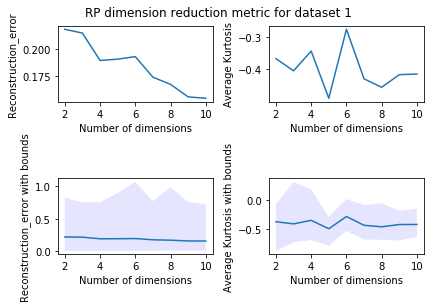

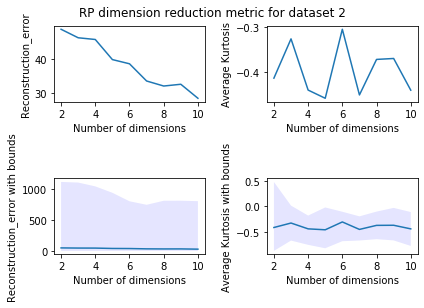

In [23]:
for idx, df in enumerate([dataset1_df, dataset2_df]):
    

    features = list(set(df.columns) - set(['label']))
    X = df[features]
    Y = df['label']
    K = np.arange(2,11)
    max_kur_list = []
    min_kur_list = []
    avg_kur_list = []
    max_recon_err_list = []
    min_recon_err_list = []
    avg_recon_err_list = []
    
    for k in K:
        
        temp_recon_err_list = []
        temp_kurtosis_list = []
        for trial in range(trials):
            rp = GaussianRandomProjection(n_components=k)
            trans_X = rp.fit_transform(X)
            p_inv = np.linalg.pinv(rp.components_.T)
            proj_X = np.dot(trans_X, p_inv)
            recon_err = np.square(X - proj_X).mean()
            temp_recon_err_list.append(recon_err)
            
            kurtosis_val = np.mean(kurtosis(trans_X)) #higher kurtosis -> higher extreme end values
            temp_kurtosis_list.append(kurtosis_val)
            
        min_kur_list.append(np.min(temp_kurtosis_list))
        max_kur_list.append(np.max(temp_kurtosis_list))
        avg_kur_list.append(np.mean(temp_kurtosis_list))
        
        min_recon_err_list.append(np.min(temp_recon_err_list))
        max_recon_err_list.append(np.max(temp_recon_err_list))
        avg_recon_err_list.append(np.mean(temp_recon_err_list))

    plt.suptitle(f'RP dimension reduction metric for dataset {idx+1}', y=1.02)\
    
    plt.subplot(2,2,1)
    plt.plot(K, avg_recon_err_list)
    plt.ylabel('Reconstruction_error')
    plt.xlabel('Number of dimensions')
#     plt.fill_between(K, min_recon_err_list, max_recon_err_list, facecolor='blue', alpha=0.1)
    
    plt.subplot(2,2,2)
    plt.plot(K, avg_kur_list)
#     plt.fill_between(K, min_kur_list, max_kur_list, facecolor='blue', alpha=0.1)
    plt.ylabel('Average Kurtosis')
    plt.xlabel('Number of dimensions')
    
    plt.subplot(2,2,3)
    plt.plot(K, avg_recon_err_list)
    plt.fill_between(K, min_recon_err_list, max_recon_err_list, facecolor='blue', alpha=0.1)
    plt.ylabel('Reconstruction_error with bounds')
    plt.xlabel('Number of dimensions')

    plt.subplot(2,2,4)
    plt.plot(K, avg_kur_list)
    plt.fill_between(K, min_kur_list, max_kur_list, facecolor='blue', alpha=0.1)
    plt.ylabel('Average Kurtosis with bounds')
    plt.xlabel('Number of dimensions')
    
    plt.tight_layout()
    plt.show()    

selected 10 dimensions for dataset 1 <br>
selected 5 dimensions for dataset 2